<font size="4">**1. Импорт библиотек и загрузка данных**</font>

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Загрузка данных (пример)
df = pd.read_excel('Свод ГО и подразделения.xlsx')  

<font size="4">**2. Предварительный анализ данных**</font> <br>
<br>
Проверим структуру данных:

In [294]:
# Сводная таблица по двум категориям
headquarters = df[df['type'] == 'Головной офис']
subdivisions = df[df['type'] != 'Головной офис']

summary_table = pd.DataFrame({
    'Категория': ['Головные офисы', 'Подразделения', 'Всего'],
    'Количество': [len(headquarters), len(subdivisions), len(df)],
    'Доля (%)': [
        round(len(headquarters)/len(df)*100, 2),
        round(len(subdivisions)/len(df)*100, 2),
        100.00
    ]
})

print("Сводная таблица:")
print(summary_table.to_string(index=False))

Сводная таблица:
     Категория  Количество  Доля (%)
Головные офисы        7909      16.2
 Подразделения       40917      83.8
         Всего       48826     100.0


In [296]:
# Сводная таблица по двум категориям
headquarters = df[df['type'] == 'Головной офис']
subdivisions = df[df['type'] != 'Головной офис']

# Создаем основную таблицу
summary_data = []

# Головные офисы - заголовок
summary_data.append({'Категория': '=== ГОЛОВНЫЕ ОФИСЫ ===', 'Количество': len(headquarters), 'Доля (%)': round(len(headquarters)/len(df)*100, 2)})

# Детализация по видам организаций для головных офисов
for tp_value, count in headquarters['tp'].value_counts().items():
    summary_data.append({'Категория': f"  {tp_value}", 'Количество': count, 'Доля (%)': round(count/len(df)*100, 2)})

# Подразделения - заголовок
summary_data.append({'Категория': '=== ПОДРАЗДЕЛЕНИЯ ===', 'Количество': len(subdivisions), 'Доля (%)': round(len(subdivisions)/len(df)*100, 2)})

# Детализация по видам организаций для подразделений
for tp_value, count in subdivisions['tp'].value_counts().items():
    summary_data.append({'Категория': f"  {tp_value}", 'Количество': count, 'Доля (%)': round(count/len(df)*100, 2)})

# Итого
summary_data.append({'Категория': '=== ВСЕГО ===', 'Количество': len(df), 'Доля (%)': 100.00})

summary_table = pd.DataFrame(summary_data)

print("Сводная таблица:")
print(summary_table.to_string(index=False))

Сводная таблица:
                                                                                                     Категория  Количество  Доля (%)
                                                                                        === ГОЛОВНЫЕ ОФИСЫ ===        7909     16.20
                                                                                                      Ломбарды        1854      3.80
                                                                         Кредитные потребительские кооперативы        1333      2.73
                                                                                       Микрокредитные компании         866      1.77
                                                                                  Операторы по приему платежей         669      1.37
                                                    Сельскохозяйственные кредитные потребительские кооперативы         501      1.03
                                                    

In [298]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48826 entries, 0 to 48825
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                46694 non-null  object 
 1   inn                 48826 non-null  object 
 2   ogrn                48826 non-null  object 
 3   adr                 48820 non-null  object 
 4   tp                  48826 non-null  object 
 5   type                48826 non-null  object 
 6   main_name           40100 non-null  object 
 7   main_adr            40100 non-null  object 
 8   short_name          7909 non-null   object 
 9   subj_code1          7909 non-null   object 
 10  subj_code2          7909 non-null   object 
 11  found_by            48811 non-null  object 
 12  postal_code         47503 non-null  object 
 13  federal_district    48821 non-null  object 
 14  region              48826 non-null  object 
 15  area                21425 non-null  object 
 16  city

<font size="4">**3. Группировка по федеральным округам и регионам**</font> <br>
<br>
3.1. Количество организаций по федеральным округам

In [301]:
# Создаем копию данных для работы
df_plot = df.copy()

In [303]:
# Заменяем пустые значения в federal_district на "Новые регионы"
df_plot['federal_district'] = df_plot['federal_district'].fillna('Иные')

# Группировка по федеральным округам
district_stats = df_plot.groupby('federal_district', as_index=False).size().sort_values('size', ascending=False)
district_stats

,federal_district,size
8,Центральный,12397
3,Приволжский,10592
6,Сибирский,6356
9,Южный,5650
4,Северо-Западный,4425
7,Уральский,4379
0,Дальневосточный,2872
5,Северо-Кавказский,1496
2,Новые регионы,654
1,Иные,5


In [305]:
# Подсчет головных офисов и подразделений для каждого округа
headquarters_count = df_plot[df_plot['type'] == 'Головной офис'].groupby('federal_district').size()
subdivisions_count = df_plot[df_plot['type'] != 'Головной офис'].groupby('federal_district').size()

In [307]:
# Добавляем данные в таблицу
district_stats = district_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='federal_district', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='federal_district', 
    right_index=True, 
    how='left'
)
district_stats

,federal_district,size,headquarters,subdivisions
8,Центральный,12397,3415,8982
3,Приволжский,10592,1159,9433
6,Сибирский,6356,928,5428
9,Южный,5650,648,5002
4,Северо-Западный,4425,622,3803
7,Уральский,4379,458,3921
0,Дальневосточный,2872,384,2488
5,Северо-Кавказский,1496,259,1237
2,Новые регионы,654,35,619
1,Иные,5,1,4


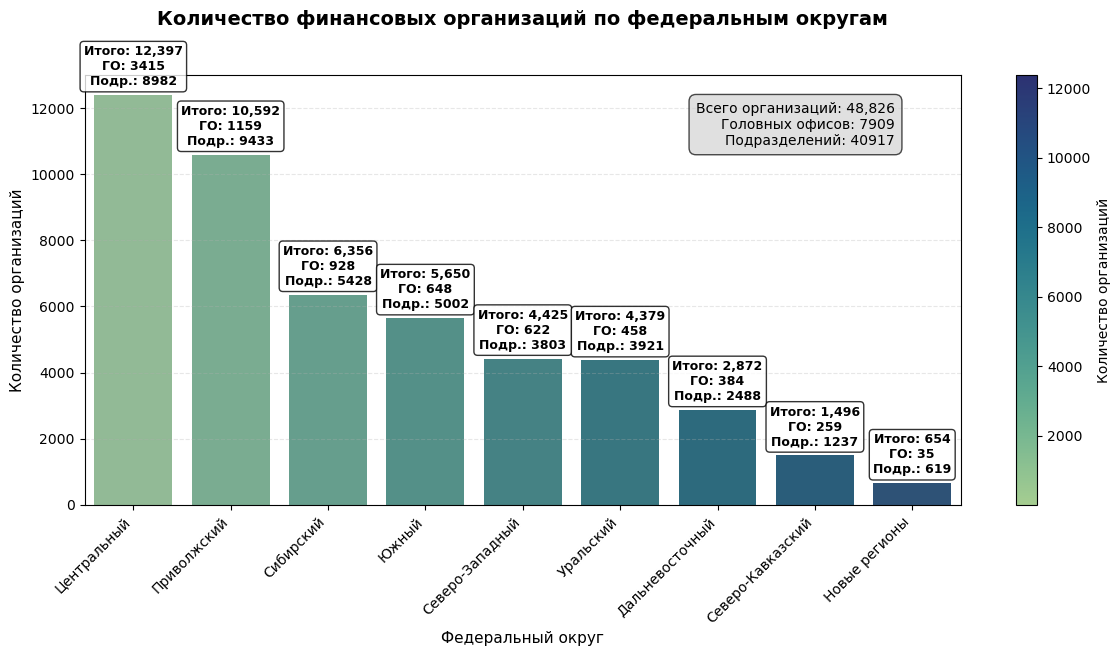

Статистика по федеральным округам:
 federal_district  size  headquarters  subdivisions
      Центральный 12397          3415          8982
      Приволжский 10592          1159          9433
        Сибирский  6356           928          5428
            Южный  5650           648          5002
  Северо-Западный  4425           622          3803
        Уральский  4379           458          3921
  Дальневосточный  2872           384          2488
Северо-Кавказский  1496           259          1237
    Новые регионы   654            35           619
             Иные     5             1             4

Всего организаций: 48826
Головных офисов: 7909
Подразделений: 40917


In [309]:
# Нормализуем значения для цветовой шкалы (0-1)
norm = plt.Normalize(district_stats['size'].min(), district_stats['size'].max())

# Задаем явный порядок
correct_order = [
    'Центральный',
    'Приволжский', 
    'Сибирский',
    'Южный',
    'Северо-Западный',
    'Уральский',
    'Дальневосточный',
    'Северо-Кавказский',
    'Новые регионы'
]

# Создаем словарь с данными
data_dict = {}
for district in correct_order:
    data = district_stats[district_stats['federal_district'] == district].iloc[0]
    data_dict[district] = {
        'total': data['size'],
        'ho': data['headquarters'],
        'sub': data['subdivisions']
    }
    
# Визуализация (столбчатая диаграмма)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=district_stats, 
    x='federal_district', 
    y='size', 
    hue='federal_district',  
    palette="crest", 
    legend=False,            
    dodge=False,
    order=correct_order      
)

# Добавляем подписи в правильном порядке
for i, p in enumerate(ax.patches):
    district_name = correct_order[i]
    data = data_dict[district_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Добавляем цветовую шкалу
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("crest", as_cmap=True), norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Количество организаций', fontsize=10)

# Настройка внешнего вида
plt.title('Количество финансовых организаций по федеральным округам\n', 
          pad=20, fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество организаций', fontsize=11)
plt.xlabel('Федеральный округ', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Добавляем общую статистику СПРАВА
total_orgs = len(df_plot)
total_ho = len(df_plot[df_plot['type'] == 'Головной офис'])
total_sub = len(df_plot[df_plot['type'] != 'Головной офис'])

# Перемещаем блок статистики в правый верхний угол
plt.figtext(0.75, 0.75, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Место для подписи внизу
plt.show()

# Выводим статистику в консоль для проверки
print("Статистика по федеральным округам:")
print(district_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")

<font size="4">**3.2. Количество организаций по регионам (ТОП-15)**</font>

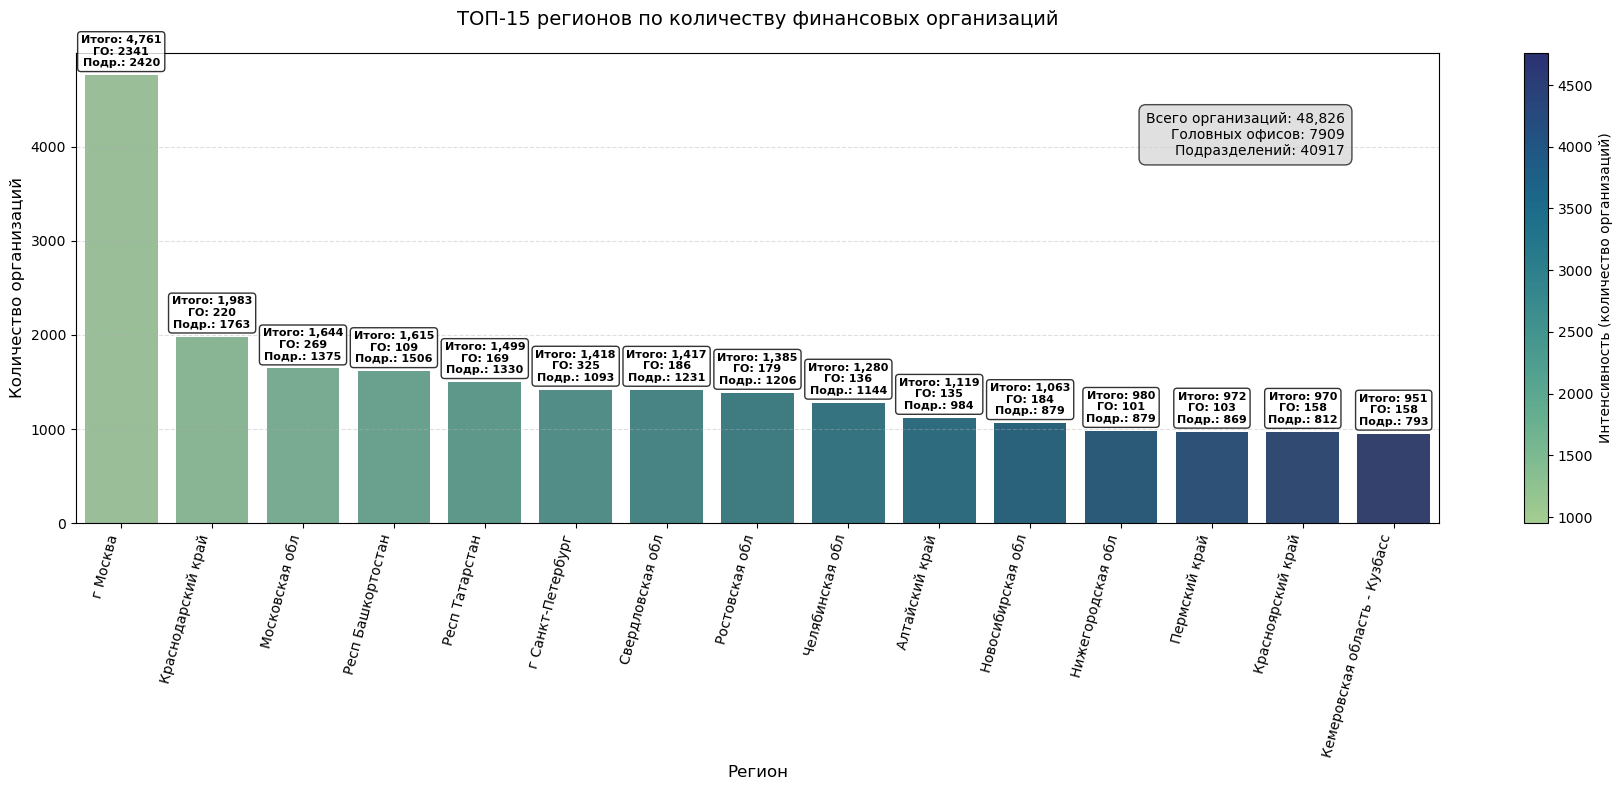

Статистика по ТОП-15 регионам:
                       region  size  headquarters  subdivisions
                     г Москва  4761          2341          2420
           Краснодарский край  1983           220          1763
               Московская обл  1644           269          1375
            Респ Башкортостан  1615           109          1506
               Респ Татарстан  1499           169          1330
            г Санкт-Петербург  1418           325          1093
             Свердловская обл  1417           186          1231
               Ростовская обл  1385           179          1206
              Челябинская обл  1280           136          1144
               Алтайский край  1119           135           984
            Новосибирская обл  1063           184           879
            Нижегородская обл   980           101           879
                Пермский край   972           103           869
            Красноярский край   970           158           812
Кемеровск

In [312]:
# Группировка по регионам
region_stats = df.groupby('region', as_index=False).size().sort_values('size', ascending=False).head(15)

# Подсчет головных офисов и подразделений для каждого региона
headquarters_count = df[df['type'] == 'Головной офис'].groupby('region').size()
subdivisions_count = df[df['type'] != 'Головной офис'].groupby('region').size()

# Добавляем данные в таблицу
region_stats = region_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='region', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='region', 
    right_index=True, 
    how='left'
)

# Заполняем пропущенные значения нулями
region_stats[['headquarters', 'subdivisions']] = region_stats[['headquarters', 'subdivisions']].fillna(0).astype(int)

# Нормализуем значения для цветовой шкалы
norm = plt.Normalize(region_stats['size'].min(), region_stats['size'].max())

# Создаем словарь с данными для быстрого доступа
data_dict = {}
for _, row in region_stats.iterrows():
    data_dict[row['region']] = {
        'total': row['size'],
        'ho': row['headquarters'],
        'sub': row['subdivisions']
    }

# Визуализация
plt.figure(figsize=(18, 8))
ax = sns.barplot(
    data=region_stats, 
    x='region', 
    y='size', 
    hue='region',  
    palette=sns.color_palette("crest", n_colors=len(region_stats)),
    legend=False,
    dodge=False
)

# Добавляем подписи данных с детализацией
for i, p in enumerate(ax.patches):
    # Получаем название региона из подписи на оси X
    region_name = region_stats.iloc[i]['region']
    data = data_dict[region_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=8,  # Немного уменьшил шрифт для регионов
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Настройка внешнего вида
plt.title('ТОП-15 регионов по количеству финансовых организаций', 
          fontsize=14, pad=20)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Количество организаций', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Добавляем цветовую шкалу
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("crest", as_cmap=True), norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Интенсивность (количество организаций)', fontsize=10)

# Добавляем общую статистику СПРАВА
total_orgs = len(df)
total_ho = len(df[df['type'] == 'Головной офис'])
total_sub = len(df[df['type'] != 'Головной офис'])

# Перемещаем блок статистики в правый верхний угол
plt.figtext(0.75, 0.8, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.show()

# Выводим статистику в консоль для проверки
print("Статистика по ТОП-15 регионам:")
print(region_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")

<font size="4">**3.3. Количество организаций по городам (ТОП-15)**</font>

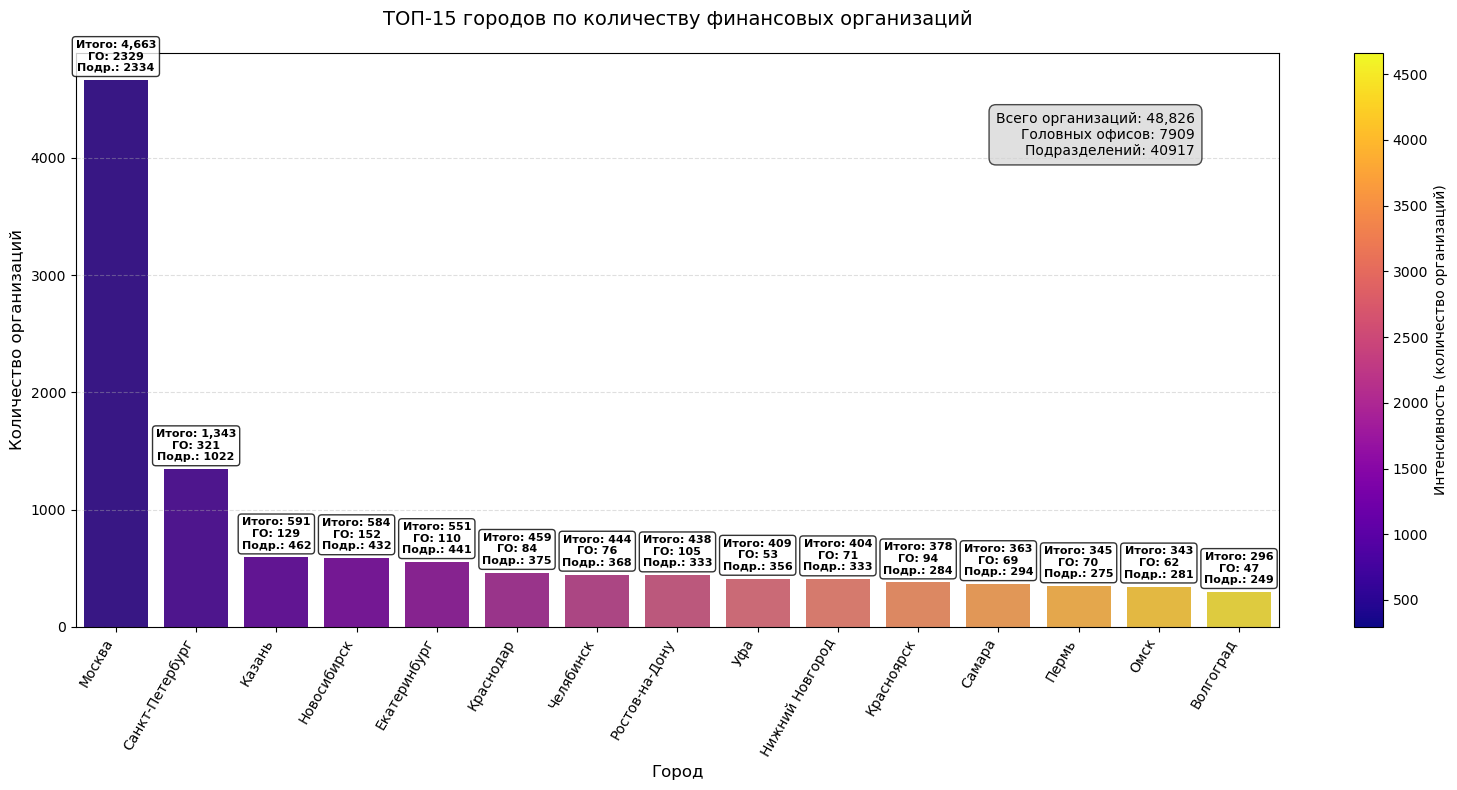

Статистика по ТОП-15 городам:
           city  size  headquarters  subdivisions
         Москва  4663          2329          2334
Санкт-Петербург  1343           321          1022
         Казань   591           129           462
    Новосибирск   584           152           432
   Екатеринбург   551           110           441
      Краснодар   459            84           375
      Челябинск   444            76           368
 Ростов-на-Дону   438           105           333
            Уфа   409            53           356
Нижний Новгород   404            71           333
     Красноярск   378            94           284
         Самара   363            69           294
          Пермь   345            70           275
           Омск   343            62           281
      Волгоград   296            47           249

Всего организаций: 48826
Головных офисов: 7909
Подразделений: 40917


In [315]:
# Группировка по городам
city_stats = df.groupby('city', as_index=False).size().sort_values('size', ascending=False).head(15)

# Подсчет головных офисов и подразделений для каждого города
headquarters_count = df[df['type'] == 'Головной офис'].groupby('city').size()
subdivisions_count = df[df['type'] != 'Головной офис'].groupby('city').size()

# Добавляем данные в таблицу
city_stats = city_stats.merge(
    headquarters_count.rename('headquarters'), 
    left_on='city', 
    right_index=True, 
    how='left'
).merge(
    subdivisions_count.rename('subdivisions'), 
    left_on='city', 
    right_index=True, 
    how='left'
)

# Заполняем пропущенные значения нулями
city_stats[['headquarters', 'subdivisions']] = city_stats[['headquarters', 'subdivisions']].fillna(0).astype(int)

# Нормализуем значения для цветовой шкалы
norm = plt.Normalize(city_stats['size'].min(), city_stats['size'].max())

# Создаем словарь с данными для быстрого доступа
data_dict = {}
for _, row in city_stats.iterrows():
    data_dict[row['city']] = {
        'total': row['size'],
        'ho': row['headquarters'],
        'sub': row['subdivisions']
    }

# Визуализация с подписями данных
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    data=city_stats, 
    x='city', 
    y='size', 
    hue='city',
    palette='plasma',
    legend=False,
    dodge=False
)

# Добавляем подписи данных с детализацией
for i, p in enumerate(ax.patches):
    # Получаем название города из данных
    city_name = city_stats.iloc[i]['city']
    data = data_dict[city_name]
    
    ax.annotate(
        f'Итого: {data["total"]:,}\nГО: {data["ho"]}\nПодр.: {data["sub"]}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=8,  # Уменьшенный шрифт для компактности
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

# Настройка внешнего вида
plt.title('ТОП-15 городов по количеству финансовых организаций', fontsize=14, pad=20)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество организаций', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Добавляем цветовую шкалу
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Интенсивность (количество организаций)', fontsize=10)

# Добавляем общую статистику СПРАВА
total_orgs = len(df)
total_ho = len(df[df['type'] == 'Головной офис'])
total_sub = len(df[df['type'] != 'Головной офис'])

# Перемещаем блок статистики в правый верхний угол
plt.figtext(0.75, 0.8, 
           f'Всего организаций: {total_orgs:,}\nГоловных офисов: {total_ho}\nПодразделений: {total_sub}',
           fontsize=10, 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7),
           ha='right')

plt.tight_layout()
plt.show()

# Выводим статистику в консоль для проверки
print("Статистика по ТОП-15 городам:")
print(city_stats.to_string(index=False))
print(f"\nВсего организаций: {total_orgs}")
print(f"Головных офисов: {total_ho}")
print(f"Подразделений: {total_sub}")